<a href="https://colab.research.google.com/github/skripkadmitry/repositorium/blob/master/iterative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
compartments = np.array([[0, 100], [300,450], [700,800], [870,1000]])
compartments_1 = np.array([[0, 50], [700, 800], [900, 950]])

In [ ]:
tbl = pd.read_csv('heatmap.tsv', sep='\t', header=None).to_numpy() #input data

<AxesSubplot:>

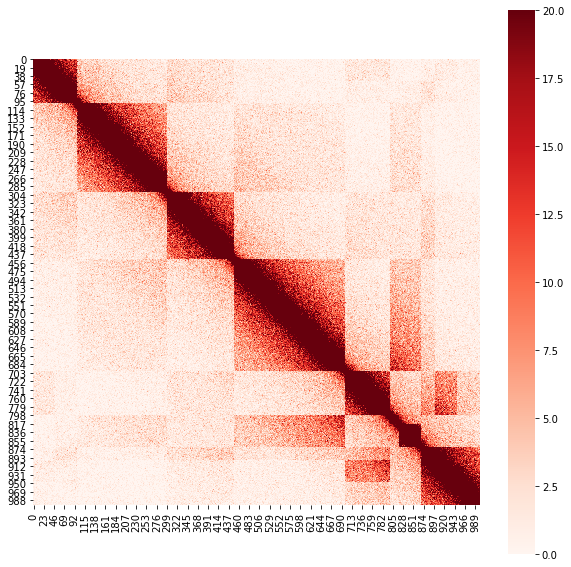

In [ ]:
plt.figure(figsize=[10,10])
sns.heatmap(tbl, cmap='Reds', square=True, vmax=20)

In [ ]:
tbl_sym = tbl.copy() #clearify data
n = len(tbl)
dB = np.random.normal(loc=0, scale=1, size=n)
B = np.array([1.0] * n)
print(B[0])
while np.std(dB) > 0.01:
    Sum = np.array([sum(I) for I in tbl_sym.T])
    dB = Sum / np.mean(Sum)
    for i in range(n):
        if dB[i] == 0:
            dB[i] = 1
    for i in range(n):
        for j in range(n):
            tbl_sym[i][j] = tbl_sym[i][j] / dB[i] / dB[j]
    for i in range(n):
        B[i] = B[i] * dB[i]
    print(B[0])

1.0
0.6241
0.7865426578794983
0.6751095101688279
0.7525453018862026
0.6915132771054596
0.738913120583844
0.6999736657122013
0.7313854614460681
0.7052416197500344
0.7266759263293141
0.7087604640414117
0.7235692661682959


<AxesSubplot:>

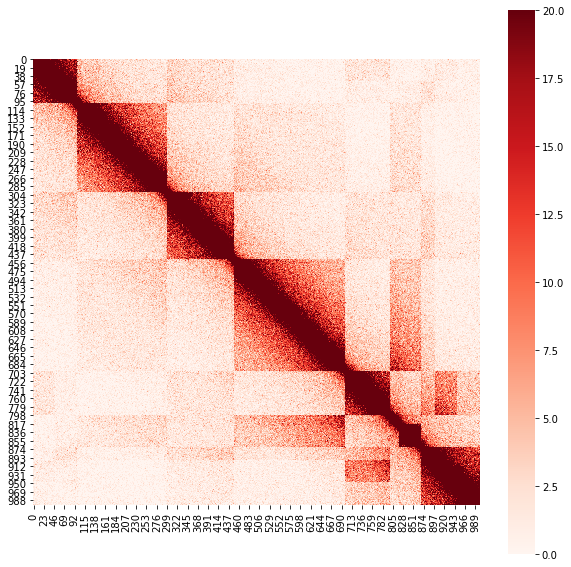

In [ ]:
plt.figure(figsize=[10,10])
sns.heatmap(tbl_sym, cmap='Reds', square=True, vmax=20)

<AxesSubplot:>

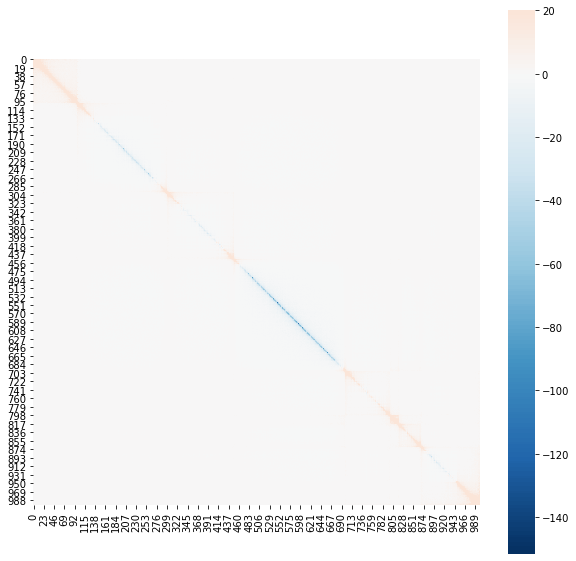

In [ ]:
checker = tbl_sym - tbl
plt.figure(figsize=[10,10])
sns.heatmap(checker, cmap='RdBu_r', square=True, vmax=20, center = 0)

In [ ]:
eighval, eighvec = np.linalg.eigh(tbl_sym) #compute and sort eigenvectors
components = (sorted(zip(eighval, eighvec.T), key=lambda x: -abs(x[0])))

In [ ]:
PC_1 = components[0][1]
#print(tbl_sym @ PC_1)
PC_2 = components[1][1]
#print(tbl_sym @ PC_2)
vector1 = tbl_sym @ PC_1
vector2 = tbl_sym @ PC_2

Text(0, 0.5, 'PC 2')

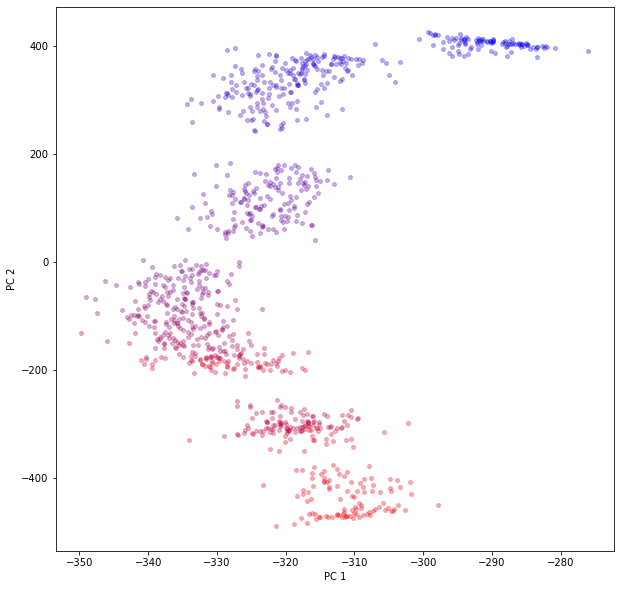

In [ ]:
plt.figure(figsize=[10,10])
for i in range(n):
    try:
        plt.scatter(vector1[i], vector2[i], color=(i / 1000, 0, 1 - i / 1000), alpha = 0.3, s=15)
    except ValueError:
        print(i * 256 // 1000, 0, 0)
plt.xlabel('PC 1')
plt.ylabel('PC 2')

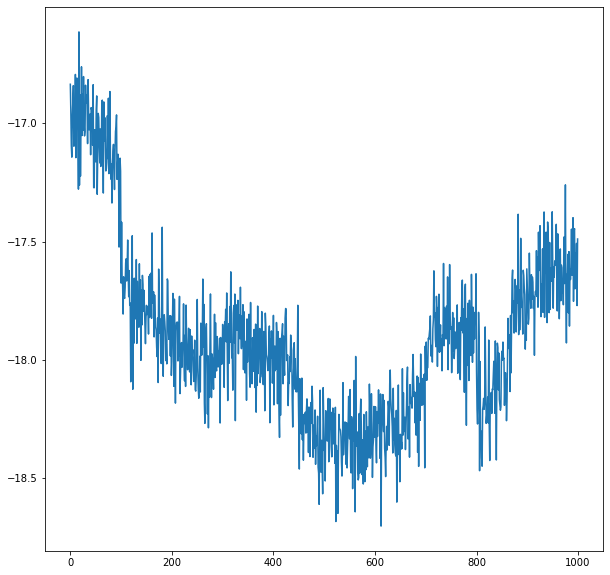

In [ ]:
plt.figure(figsize=[10,10])
plt.plot(np.sign(vector1) * (np.abs(vector1) ** 0.5) )
#plt.plot(np.sign(vector2) * (np.abs(vector2) ** 0.5) )

In [ ]:
# Generate observed over expected matrix
l = len(tbl_sym)
m = [np.mean(np.diag(tbl_sym, i)) for i in range(l)] # vector of means per diagonal
tbl_expected = np.ones([l,l]) # future expected matrix
for i in range(l):
    np.fill_diagonal(tbl_expected[i:, :], m[i])
    np.fill_diagonal(tbl_expected[:, i:], m[i])
# Generate observed over expected matrix:
tbl_OOE = (tbl_sym+1)/(tbl_expected+1) # Add pseudocount
tbl_OOE -= 1 # Center on zero

<AxesSubplot:>

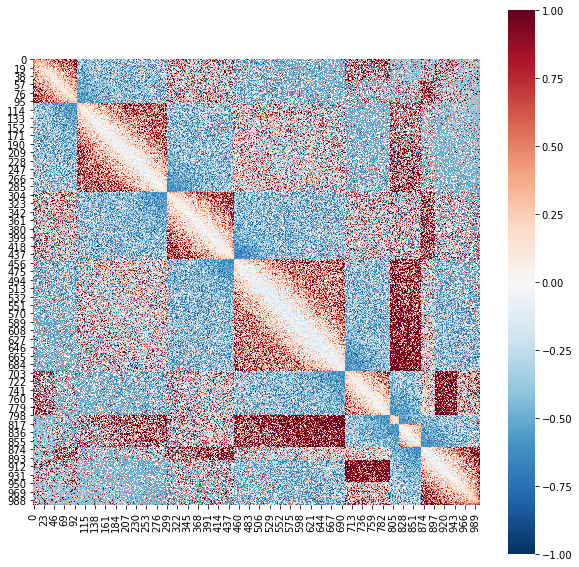

In [ ]:
plt.figure(figsize=[10,10])
sns.heatmap(tbl_OOE, cmap='RdBu_r', square=True, vmax=1, vmin=-1, center=0)

In [ ]:
# btw, for HI-C matrices, one can use the already-implemented functions, such as this one: 
# https://github.com/open2c/cooltools/blob/7bb960848f23dc187078d5c84287d3d073adb999/cooltools/eigdecomp.py#L62

eighval, eighvec = np.linalg.eigh(tbl_OOE) # compute and sort eigenvectors
components = sorted(zip(eighval, eighvec.T), key=lambda x: -abs(x[0])) # Note the critical error was here <------
# eigenvalues might be positive or negative, but that means is absolute value
values = sorted(eighval, key=lambda x: -abs(x))

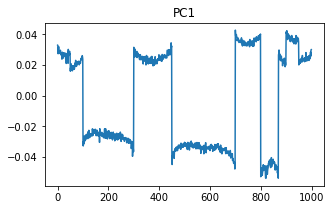

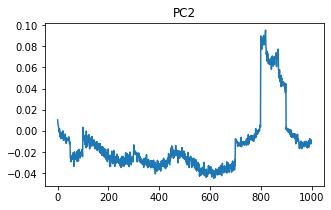

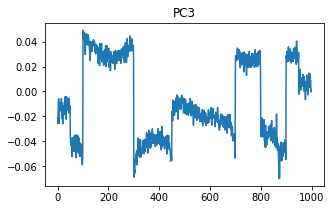

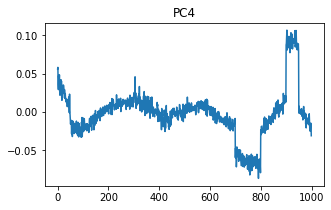

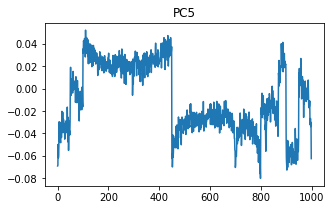

In [ ]:
for i in range(5):
    plt.figure(figsize=[5,3])
    plt.plot(components[i][1])
    plt.title(f'PC{i+1}')

In [ ]:
PC_1 = components[0][1]
PC_2 = components[1][1]
#vector1 = tbl_sym @ PC_1
#vector2 = tbl_sym @ PC_2
# What can be recovered by 1st component? 
mtx_reconstructed = np.outer(components[2][1], components[2][1])

<AxesSubplot:>

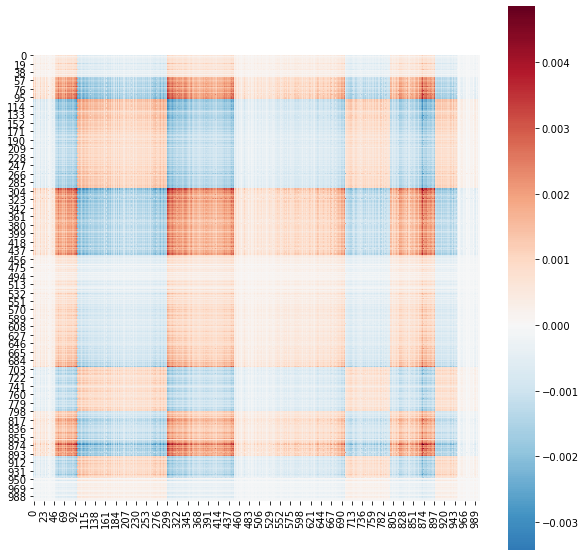

In [ ]:
# Ну красиво ведь!
plt.figure(figsize=[10,10])
sns.heatmap(mtx_reconstructed, cmap='RdBu_r', square=True, center=0)#, vmax=1, vmin=-1)

Text(0, 0.5, 'PC 2')

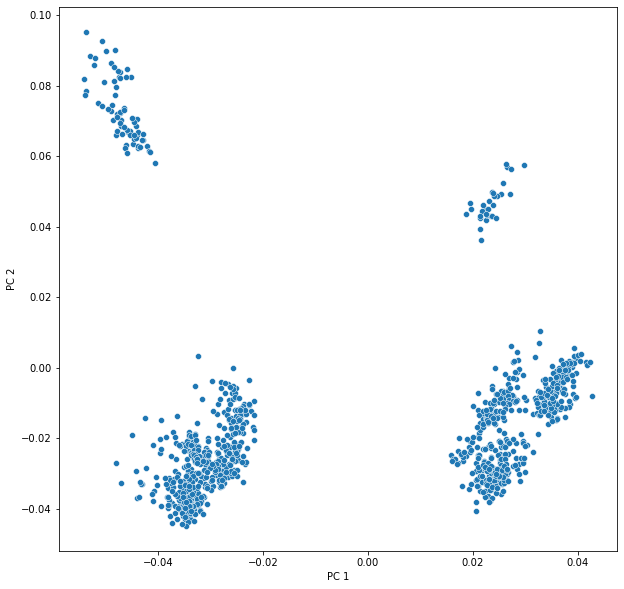

In [ ]:
# simplified scatterplot
# also, we don't need the @ operator to see the effect here, luckily
plt.figure(figsize=[10,10])
sns.scatterplot(x = PC_1, y = PC_2)
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [ ]:
values[:3]

[282.8921399959604, -158.9464280100687, 97.35076101734612]

In [ ]:
clustering = np.matrix((eighvec)[:2]).T

In [ ]:
print(clustering)

[[ 0.01039241  0.0069185 ]
 [ 0.0562129   0.05825902]
 [-0.03134358 -0.02417103]
 ...
 [-0.06900042 -0.06832084]
 [-0.02124862 -0.02580652]
 [ 0.03284498  0.03262888]]


In [ ]:
kmeans = KMeans(n_clusters = 4).fit(clustering)

In [ ]:
kmeans.labels_

array([3, 3, 2, 3, 1, 3, 2, 0, 1, 3, 1, 0, 1, 0, 2, 3, 1, 2, 3, 1, 1, 3,
       1, 3, 2, 3, 2, 0, 1, 0, 2, 0, 1, 3, 1, 3, 0, 1, 3, 2, 0, 0, 1, 3,
       1, 0, 3, 3, 2, 2, 3, 2, 1, 3, 0, 1, 1, 3, 3, 0, 2, 1, 1, 3, 3, 0,
       2, 2, 0, 1, 2, 1, 3, 1, 3, 0, 3, 1, 1, 1, 0, 2, 3, 1, 0, 2, 3, 1,
       3, 2, 3, 1, 1, 2, 1, 2, 1, 1, 0, 2, 3, 0, 2, 0, 1, 0, 2, 3, 2, 3,
       0, 1, 3, 0, 1, 0, 2, 3, 1, 2, 3, 3, 1, 0, 1, 0, 1, 1, 3, 1, 3, 0,
       0, 1, 3, 2, 3, 3, 1, 1, 3, 1, 1, 1, 3, 2, 2, 3, 3, 2, 1, 1, 3, 1,
       1, 2, 0, 2, 1, 1, 2, 3, 2, 1, 0, 1, 1, 3, 0, 1, 1, 0, 0, 3, 1, 1,
       3, 2, 3, 1, 3, 1, 2, 1, 0, 3, 0, 2, 3, 1, 0, 2, 0, 3, 3, 3, 1, 1,
       1, 3, 1, 1, 2, 1, 0, 2, 0, 1, 1, 3, 1, 0, 2, 2, 3, 0, 0, 3, 1, 0,
       0, 2, 2, 0, 3, 1, 1, 2, 0, 3, 3, 1, 1, 1, 3, 3, 0, 2, 1, 3, 3, 3,
       1, 2, 3, 3, 3, 1, 2, 1, 3, 3, 3, 0, 3, 2, 1, 3, 3, 0, 2, 2, 0, 0,
       2, 2, 2, 3, 3, 3, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 3, 3, 2, 3, 1, 0,
       3, 3, 3, 3, 1, 2, 3, 3, 1, 3, 0, 2, 2, 3, 3,

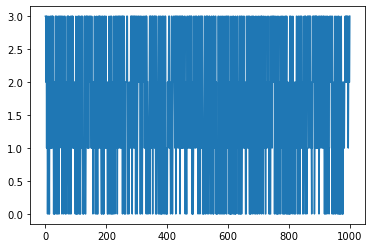

In [ ]:
plt.plot(kmeans.labels_)

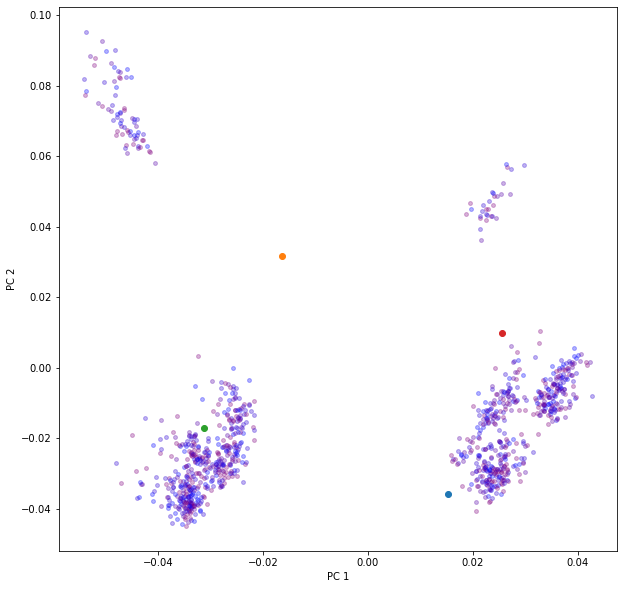

In [ ]:
plt.figure(figsize=[10,10])
for i in range(n):
    try:
        plt.scatter(PC_1[i], PC_2[i], color=(kmeans.labels_[i] / 6, 0, 1 - kmeans.labels_[i] / 6), alpha = 0.3, s=15)
    except ValueError:
        print(kmeans.labels_[i] * 25, 0, 1 - kmeans.labels_[i] * 25)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
for el in kmeans.cluster_centers_:
    plt.scatter(el[0], el[1])

In [ ]:
kmeans.cluster_centers_

array([[ 0.01532032, -0.03577107],
       [-0.01644116,  0.03173417],
       [-0.03117601, -0.01700855],
       [ 0.02553025,  0.00976776]])